<a href="https://colab.research.google.com/github/faranak5171/Computer-Vision-Projects/blob/main/opencv_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt

(1367, 1025, 3)
width: 1025, height: 1367


Text(0.5, 1.0, 'Fill eyes')

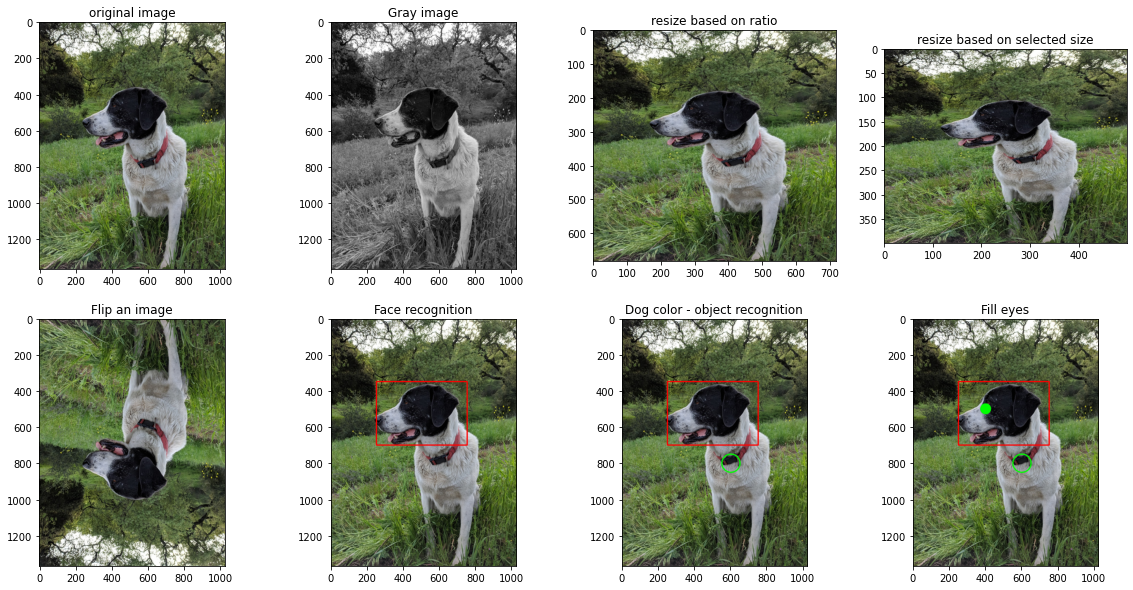

In [5]:
pic = cv2.imread('sammy.jpg')
fix_pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)

print(fix_pic.shape)
width = fix_pic.shape[1]
height = fix_pic.shape[0]
print(f"width: {width}, height: {height}")

fig = plt.figure(figsize=(20,10))
rows = 2
cols = 4
ax = fig.add_subplot(rows,cols,1)
ax.imshow(fix_pic)
ax.set_title('original image')

#Show image in grayscale
gray_pic = cv2.imread('sammy.jpg', cv2.IMREAD_GRAYSCALE)
ax = fig.add_subplot(rows,cols,2)
ax.imshow(gray_pic, cmap='gray')
ax.set_title('Gray image')

#resize based on ratio
w_ratio = 0.7
h_ratio = 0.5
ratio_pic = cv2.resize(fix_pic,(0,0),fix_pic,w_ratio,h_ratio)
ax = fig.add_subplot(rows,cols,3)
ax.imshow(ratio_pic)
ax.set_title('resize based on ratio')

#resize based on selected size
resize_pic = cv2.resize(fix_pic,(500,400))
ax = fig.add_subplot(rows, cols, 4)
ax.imshow(resize_pic)
ax.set_title('resize based on selected size')

#Flip image
flip_pic = cv2.flip(fix_pic,0)
ax = fig.add_subplot(rows,cols,5)
ax.imshow(flip_pic)
ax.set_title('Flip an image')

# Draw a rectangle on image
cv2.rectangle(fix_pic, pt1=(250,350), pt2=(750,700), color=(255,0,0), thickness=5)
ax = fig.add_subplot(rows, cols, 6)
ax.imshow(fix_pic)
ax.set_title('Face recognition')

# Draw a circle on image
cv2.circle(img=fix_pic, center=(600,800), radius=50, color=(0,255,0), thickness=5)
ax = fig.add_subplot(rows,cols, 7)
ax.imshow(fix_pic)
ax.set_title('Dog color - object recognition')

# Draw a circle and fill 
cv2.circle(img=fix_pic, center=(400,500), radius=30, color=(0,255,0), thickness=-1)
ax = fig.add_subplot(rows,cols, 8)
ax.imshow(fix_pic)
ax.set_title('Fill eyes')